In [1]:
import os
print(os.getcwd())
os.chdir('D:/handwritten')
print(os.getcwd())

C:\Users\Administrator
D:\handwritten


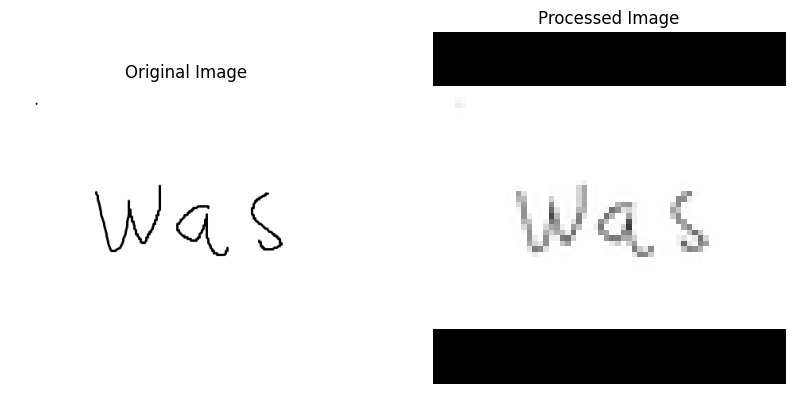

In [15]:
def resize_and_pad(img, desired_size=64):
    # Calculate proportional scaling ratio
    ratio = desired_size / max(img.size)
    new_size = (int(img.size[0] * ratio), int(img.size[1] * ratio))
    img = img.resize(new_size, Image.LANCZOS)

    # Create a new background canvas
    new_img = Image.new("L", (desired_size, desired_size), "black")
    # Paste the image in the center
    new_img.paste(img, ((desired_size - new_size[0]) // 2, (desired_size - new_size[1]) // 2))

    return new_img

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def process_image(image_path):
    # Load the image and convert it to grayscale
    image = Image.open(image_path).convert('L')

    # Resize and pad the image
    image = resize_and_pad(image, 64)

    # Convert the image to an array
    image_array = np.array(image)

    # Flatten the image to one-dimensional
    image_flattened = image_array.flatten()

    return image_flattened

# Load and process the image
image_path = 'wastest.png'
image_before = Image.open(image_path)

image_after = process_image(image_path)

# Plot the original and processed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_before, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_after.reshape(64, 64), cmap='gray')
plt.title('Processed Image')
plt.axis('off')

plt.show()

In [16]:
image_after.shape

(4096,)

# One image test 
(Must have pca_model.joblib, scaler_model.joblib)

In [49]:

image_path = 'thetest.png'# Load and preprocess the single image

from PIL import Image
import numpy as np
from joblib import load

# Load the PCA model from the saved file
loaded_pca = load('pca_model.joblib')

# Load the StandardScaler object
loaded_scaler = load('scaler_model.joblib')

image = Image.open(image_path).convert('L')  # Convert to grayscale
image_resized = resize_and_pad(image, desired_size=64)  # Resize and pad if needed

# Convert the resized image to a numpy array
image_array = np.array(image_resized)

# Flatten the image to one-dimensional
image_flattened = image_array.flatten()

# Standardize the flattened image using the loaded StandardScaler object
image_standardized = loaded_scaler.transform([image_flattened])

# Apply PCA transformation
image_transformed = loaded_pca.transform(image_standardized)

# Now image_transformed contains the reduced-dimensional representation of the standardized image


In [51]:
# make a json request
import json
samples_list = image_transformed.tolist()
json_request = json.dumps({"instances": samples_list}, indent=2)
print(json_request)


{
  "instances": [
    [
      -2.8337342666794014,
      -46.33467420073745,
      -12.245397765087063,
      -15.50964497002624,
      9.689643529133372,
      -4.845954426224482,
      -10.862530381611197,
      -7.230308491787438,
      -3.0771061435196643,
      1.9004200679691272,
      8.294556357982096,
      7.410895112501139,
      0.905106571281913,
      -2.772359332681694,
      -4.439189671578898,
      -5.388603178144655,
      -5.3484271945849455,
      0.6427110649949022,
      -0.5063009738688447,
      3.421343072007672,
      4.401868902040938,
      -3.6159006153685445,
      -2.3671781535044456,
      -0.3372131395508348,
      0.36379104825209757,
      -3.0010318858238545,
      2.5795476287822985,
      -0.9613940523244769,
      1.5902804913416406,
      2.8740750961507606,
      1.0702111872484834,
      -1.4207205009429271,
      4.304976677859985,
      -3.0398251977315685,
      1.3305966192152878,
      -1.1834102548946466,
      -3.221954712204874,
     